In [52]:
import pandas as pd
import numpy as np
from math import *
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [53]:
path='uber.csv'
df=pd.read_csv(path)
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [54]:
df.isnull()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
199995,False,False,False,False,False,False,False,False,False
199996,False,False,False,False,False,False,False,False,False
199997,False,False,False,False,False,False,False,False,False
199998,False,False,False,False,False,False,False,False,False


In [55]:
df.notnull()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...
199995,True,True,True,True,True,True,True,True,True
199996,True,True,True,True,True,True,True,True,True
199997,True,True,True,True,True,True,True,True,True
199998,True,True,True,True,True,True,True,True,True


In [56]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [57]:
df.dtypes

Unnamed: 0             int64
key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [58]:
df['dropoff_longitude']=df['dropoff_longitude'].fillna(df['dropoff_longitude'].mean())

In [59]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     1
passenger_count      0
dtype: int64

In [60]:
df['dropoff_latitude']=df['dropoff_latitude'].fillna(df['dropoff_latitude'].mean())

In [61]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [62]:
df.shape

(200000, 9)

In [63]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117375,6.794812,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [64]:
def distance_transform(longitude1,longitude2,latitude1,latitude2):
    distance=[]
    for pos in range(len(longitude1)):
        long1,lati1,long2,lati2=map(radians,[longitude1[pos],latitude1[pos],longitude2[pos],latitude2[pos]])
        a=sin(lati1)*sin(lati2)+ cos(lati1)*cos(lati2)*cos(long1-long2)
        b=3440*acos(a)
        distance.append(b*1.852)
    return distance

In [65]:
df["distance_km"] = distance_transform(df["pickup_longitude"].to_numpy(), df["pickup_latitude"].to_numpy(), 
                                      df["dropoff_longitude"].to_numpy(), df["dropoff_latitude"].to_numpy())

In [66]:
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'],errors='coerce')

In [67]:
df=df.assign(pickup_hr=df['pickup_datetime'].dt.hour,pickup_day=df['pickup_datetime'].dt.day,pickup_month=df['pickup_datetime'].dt.month,pickup_year=df['pickup_datetime'].dt.year,day_of_week=df['pickup_datetime'].dt.dayofweek,day_name=df['pickup_datetime'].dt.day_name())

In [68]:
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km,pickup_hr,pickup_day,pickup_month,pickup_year,day_of_week,day_name
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,15078.463558,19,7,5,2015,3,Thursday
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,15080.903007,20,17,7,2009,4,Friday
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,15084.557672,21,24,8,2009,0,Monday
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,15088.328929,8,26,6,2009,4,Friday
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,15080.849005,17,28,8,2014,3,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1,15080.139621,10,28,10,2012,6,Sunday
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,15079.523667,1,14,3,2014,4,Friday
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2,15078.193487,0,29,6,2009,0,Monday
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1,15075.430126,14,20,5,2015,2,Wednesday


In [69]:
def find_outliers(df):
    q1=df.quantile(0.25)
    q2=df.quantile(0.75)
    iqr=q2-q1
    outliers=df[(df<(q1-1.5*iqr)) | (df>(q2+1.5*iqr))]
    return outliers

In [70]:
outlier=find_outliers(df['fare_amount'])
print(len(outlier))
print(outlier.max())
print(outlier.min())


17167
499.0
-52.0


In [71]:
df.drop(df[df['distance_km']==0].index,inplace=True)
df.drop(df[df['fare_amount']>100].index,inplace=True)
df.drop(df[df['fare_amount']<0].index,inplace=True)
df.drop(df[df['distance_km']>60].index,inplace=True)
df.drop(df[df['passenger_count']>6].index,inplace=True)
df.drop(['Unnamed: 0','key','day_name'],axis=1,inplace=True)

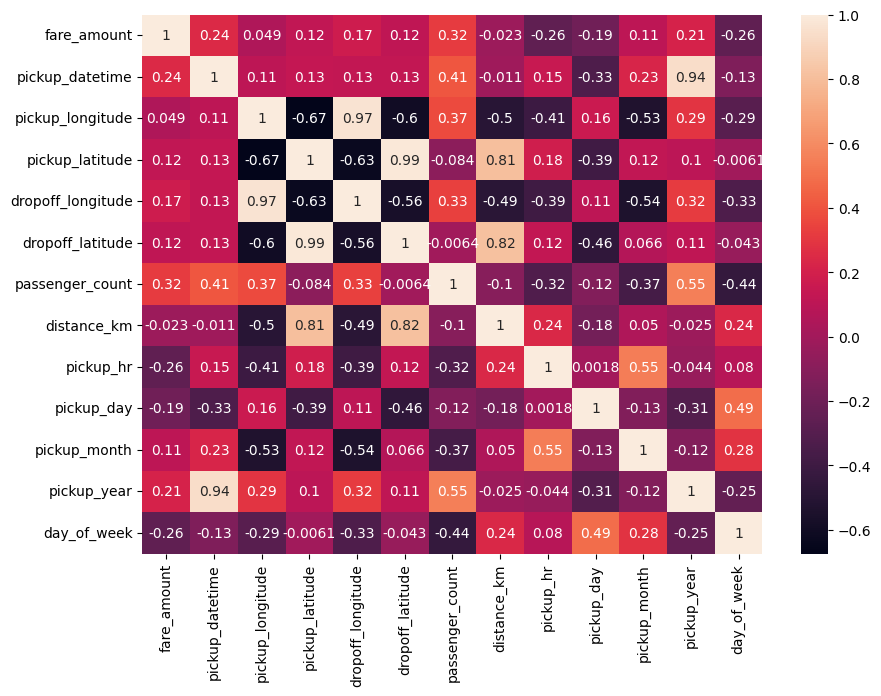

In [72]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [73]:
x=df[['pickup_year','distance_km']]
y=df['fare_amount']

In [74]:
scaler=StandardScaler()

In [75]:
x=scaler.fit_transform(x)

In [76]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [77]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [78]:
y_pre=model.predict(x_test)

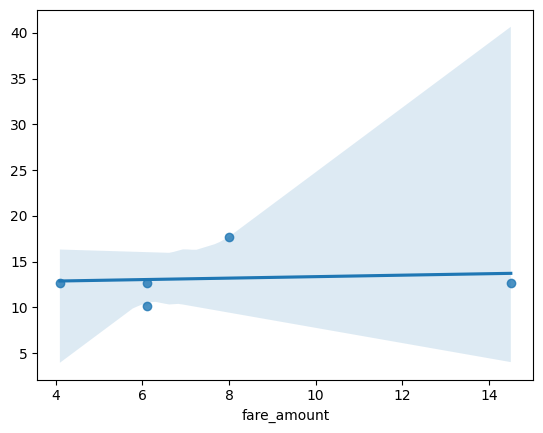

In [86]:
sns.regplot(x=y_test, y=y_pre, color="red", line_kws={"color" : "blue")
plt.show()

In [80]:
print(f"Mean absolute error {metrics.mean_absolute_error(y_test, y_pre)}")
print(f"Mean squared error {metrics.mean_squared_error(y_test, y_pre)}")
print(f"Root mean squared error {np.sqrt(metrics.mean_squared_error(y_test, y_pre))}")

Mean absolute error 6.1553465588364205
Mean squared error 46.18585794740015
Root mean squared error 6.796017800697711


In [81]:
model=RandomForestRegressor()

In [82]:
model.fit(x_train,y_train)

RandomForestRegressor()

In [83]:
y_pred=model.predict(x_test)

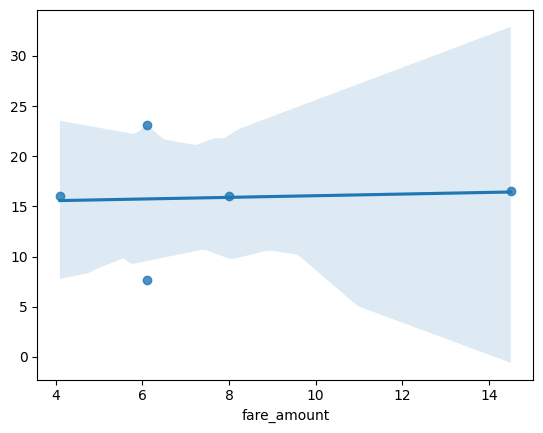

In [84]:
sns.regplot(x=y_test,y=y_pred)
plt.show()

In [85]:
print(metrics.mean_squared_error(y_test,y_pred))
print(metrics.mean_absolute_error(y_test,y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

100.78484213600018
8.11964000000001
10.039165410331686
